# California Earthquake Data Exploration

**Project:** Deep Learning for Seismic Analysis

**Dataset:** USGS California Earthquake Catalog (2015-2023)

**Objectives:**
1. Load and inspect the earthquake dataset
2. Understand data distribution and quality
3. Visualize spatial and temporal patterns
4. Identify features for deep learning models
5. Prepare data for model training

## 1. Setup and Data Loading

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("✓ Libraries imported successfully")

✓ Libraries imported successfully


In [3]:
# Load earthquake data
data_path = Path('../data/raw/earthquakes/california_earthquakes.csv')

df = pd.read_csv(data_path)
df['time'] = pd.to_datetime(df['time'])

print(f"✓ Loaded {len(df)} earthquake events")
print(f"✓ Date range: {df['time'].min()} to {df['time'].max()}")

✓ Loaded 1542 earthquake events
✓ Date range: 2015-01-04 03:18:09.480000 to 2023-12-30 02:26:27.530000


In [4]:
# Display first few rows
print("\n📊 First 5 Events:")
df.head()


📊 First 5 Events:


,event_id,time,year,month,day,hour,minute,day_of_week,day_of_year,timestamp,...,has_uncertainty,time_uncertainty_sec,azimuthal_gap_deg,stations_used,min_station_distance_deg,description,hour_sin,hour_cos,month_sin,month_cos
0,query?eventid=ci37301704&format=quakeml,2015-01-04 03:18:09.480,2015,1,4,3,18,6,4,1420341489,...,True,NaN,NaN,106.0,NaN,"14km N of Castaic, CA",0.707107,0.707107,0.5,0.866025
1,query?eventid=nn00481243&format=quakeml,2015-01-04 09:56:43.113,2015,1,4,9,56,6,4,1420365403,...,True,NaN,NaN,5.0,0.141,"43 km E of Fort Bidwell, California",0.707107,-0.707107,0.5,0.866025
2,query?eventid=nn00475344&format=quakeml,2015-01-04 20:08:14.199,2015,1,4,20,8,6,4,1420402094,...,True,NaN,NaN,5.0,0.136,"42 km E of Fort Bidwell, California",-0.866025,0.500000,0.5,0.866025
3,query?eventid=nn00475380&format=quakeml,2015-01-05 01:47:21.986,2015,1,5,1,47,0,5,1420422441,...,True,NaN,NaN,5.0,0.145,"42 km E of Fort Bidwell, California",0.258819,0.965926,0.5,0.866025
4,query?eventid=nn00475453&format=quakeml,2015-01-05 15:35:50.158,2015,1,5,15,35,0,5,1420472150,...,True,NaN,NaN,7.0,0.133,"42 km E of Fort Bidwell, California",-0.707107,-0.707107,0.5,0.866025


## 2. Dataset Overview

In [5]:
# Basic information
print("=" * 70)
print("DATASET INFORMATION")
print("=" * 70)
print(f"\nTotal Events: {len(df)}")
print(f"Features: {len(df.columns)}")
print(f"Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"\nDate Range: {df['time'].min()} to {df['time'].max()}")
print(f"Duration: {(df['time'].max() - df['time'].min()).days} days")
print(f"Years Covered: {df['year'].nunique()}")

DATASET INFORMATION

Total Events: 1542
Features: 27
Memory Usage: 0.59 MB

Date Range: 2015-01-04 03:18:09.480000 to 2023-12-30 02:26:27.530000
Duration: 3281 days
Years Covered: 9


In [6]:
# Column information
print("\n📋 Available Features:")
print("-" * 70)
for i, col in enumerate(df.columns, 1):
    non_null = df[col].notna().sum()
    pct = (non_null / len(df)) * 100
    dtype = df[col].dtype
    print(f"{i:2}. {col:30} | {dtype:10} | {non_null:4}/{len(df)} ({pct:5.1f}%)")


📋 Available Features:
----------------------------------------------------------------------


TypeError: unsupported format string passed to numpy.dtypes.ObjectDType.__format__

In [7]:
# Statistical summary
print("\n📊 Statistical Summary:")
df.describe()


📊 Statistical Summary:


,time,year,month,day,hour,minute,day_of_week,day_of_year,timestamp,latitude,...,horizontal_uncertainty_km,depth_uncertainty_km,time_uncertainty_sec,azimuthal_gap_deg,stations_used,min_station_distance_deg,hour_sin,hour_cos,month_sin,month_cos
count,1542,1542.000000,1542.000000,1542.000000,1542.000000,1542.000000,1542.000000,1542.000000,1.542000e+03,1542.000000,...,0.0,0.0,0.0,0.0,1531.000000,1534.000000,1542.000000,1542.000000,1542.000000,1542.000000
mean,2019-11-01 21:56:13.755493376,2019.328794,6.682879,13.280156,10.416991,30.485084,3.359922,185.327497,1.572645e+09,36.775491,...,NaN,NaN,NaN,NaN,56.899412,0.105998,0.086983,0.088457,-0.111601,-0.298096
min,2015-01-04 03:18:09.480000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.420341e+09,32.045833,...,NaN,NaN,NaN,NaN,4.000000,0.001033,-1.000000,-1.000000,-1.000000,-1.000000
25%,2019-07-04 17:37:17.547499776,2019.000000,5.000000,6.000000,4.000000,17.000000,2.000000,136.000000,1.562262e+09,35.623000,...,NaN,NaN,NaN,NaN,26.000000,0.037450,-0.707107,-0.500000,-0.500000,-0.866025
50%,2019-07-23 15:45:25.344999936,2019.000000,7.000000,11.000000,10.000000,31.000000,4.000000,187.000000,1.563897e+09,36.105083,...,NaN,NaN,NaN,NaN,45.000000,0.069040,0.258819,0.258819,-0.500000,-0.866025
75%,2020-12-26 20:10:42.697499904,2020.000000,8.000000,20.000000,17.000000,45.000000,5.000000,232.000000,1.609013e+09,38.192675,...,NaN,NaN,NaN,NaN,76.000000,0.117050,0.707107,0.707107,0.500000,0.500000
max,2023-12-30 02:26:27.530000,2023.000000,12.000000,31.000000,23.000000,59.000000,6.000000,366.000000,1.703903e+09,41.986833,...,NaN,NaN,NaN,NaN,289.000000,1.454000,1.000000,1.000000,1.000000,1.000000
std,NaN,2.033512,2.864213,8.610957,7.080554,16.722012,1.887705,87.447448,6.422737e+07,2.323152,...,NaN,NaN,NaN,NaN,44.566470,0.129359,0.709876,0.693775,0.616160,0.720843


## 3. Magnitude Analysis

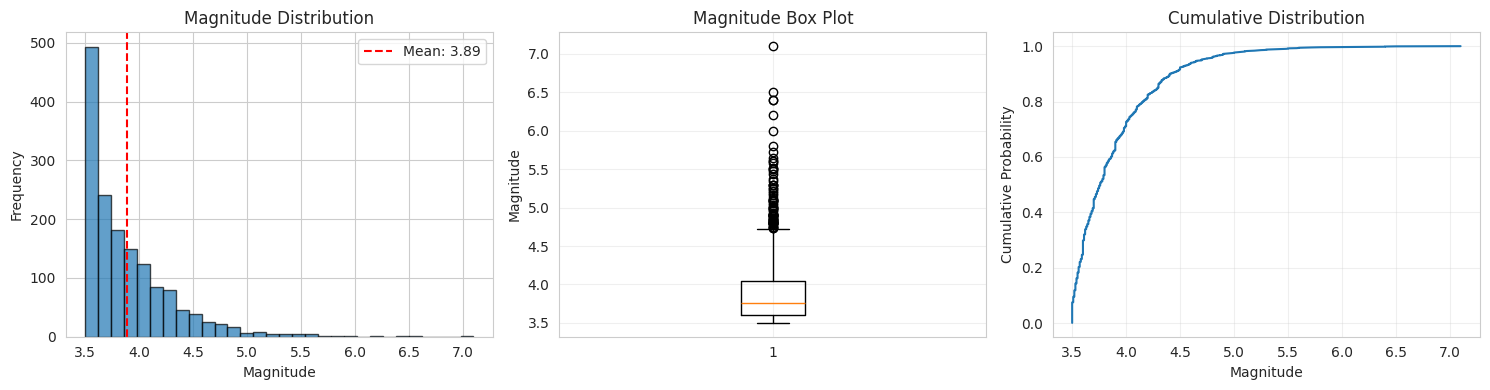


📊 Magnitude Statistics:
  Min: 3.50
  Max: 7.10
  Mean: 3.89
  Median: 3.76
  Std Dev: 0.42


In [8]:
# Magnitude distribution
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Histogram
axes[0].hist(df['magnitude'], bins=30, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Magnitude')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Magnitude Distribution')
axes[0].axvline(df['magnitude'].mean(), color='red', linestyle='--', label=f'Mean: {df["magnitude"].mean():.2f}')
axes[0].legend()

# Box plot
axes[1].boxplot(df['magnitude'], vert=True)
axes[1].set_ylabel('Magnitude')
axes[1].set_title('Magnitude Box Plot')
axes[1].grid(True, alpha=0.3)

# Cumulative distribution
sorted_mag = np.sort(df['magnitude'])
cumulative = np.arange(1, len(sorted_mag) + 1) / len(sorted_mag)
axes[2].plot(sorted_mag, cumulative)
axes[2].set_xlabel('Magnitude')
axes[2].set_ylabel('Cumulative Probability')
axes[2].set_title('Cumulative Distribution')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n📊 Magnitude Statistics:")
print(f"  Min: {df['magnitude'].min():.2f}")
print(f"  Max: {df['magnitude'].max():.2f}")
print(f"  Mean: {df['magnitude'].mean():.2f}")
print(f"  Median: {df['magnitude'].median():.2f}")
print(f"  Std Dev: {df['magnitude'].std():.2f}")

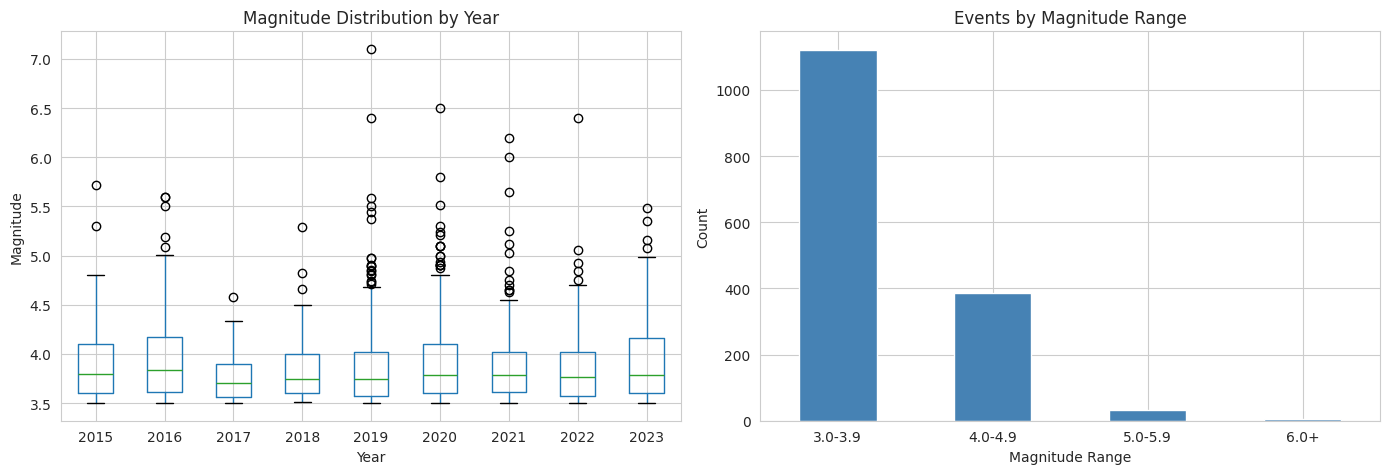

In [9]:
# Magnitude by year
plt.figure(figsize=(14, 5))

# Box plot by year
plt.subplot(1, 2, 1)
df.boxplot(column='magnitude', by='year', ax=plt.gca())
plt.xlabel('Year')
plt.ylabel('Magnitude')
plt.title('Magnitude Distribution by Year')
plt.suptitle('')

# Count by magnitude range
plt.subplot(1, 2, 2)
mag_ranges = pd.cut(df['magnitude'], bins=[3.0, 4.0, 5.0, 6.0, 10.0], 
                     labels=['3.0-3.9', '4.0-4.9', '5.0-5.9', '6.0+'])
mag_ranges.value_counts().sort_index().plot(kind='bar', color='steelblue')
plt.xlabel('Magnitude Range')
plt.ylabel('Count')
plt.title('Events by Magnitude Range')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

## 4. Spatial Distribution

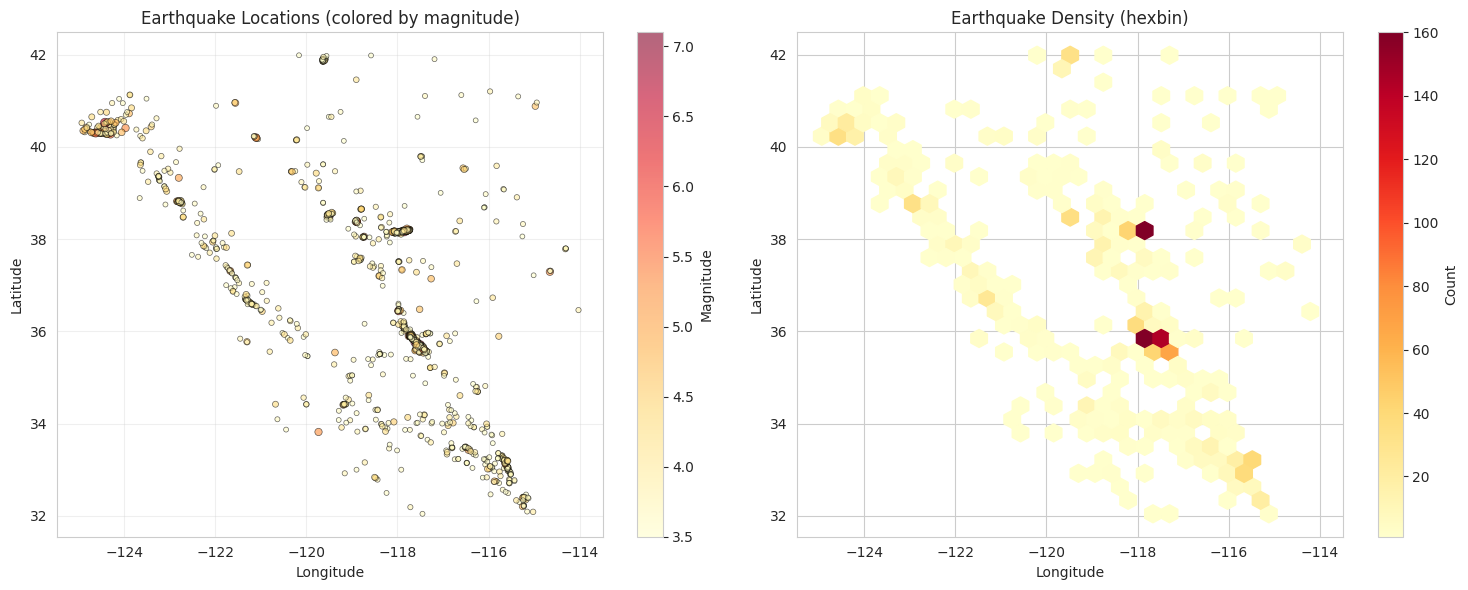

In [10]:
# Geographic distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Scatter plot - colored by magnitude
scatter = axes[0].scatter(df['longitude'], df['latitude'], 
                          c=df['magnitude'], s=df['magnitude']**2,
                          cmap='YlOrRd', alpha=0.6, edgecolors='black', linewidth=0.5)
axes[0].set_xlabel('Longitude')
axes[0].set_ylabel('Latitude')
axes[0].set_title('Earthquake Locations (colored by magnitude)')
axes[0].grid(True, alpha=0.3)
plt.colorbar(scatter, ax=axes[0], label='Magnitude')

# Hexbin plot - density
hexbin = axes[1].hexbin(df['longitude'], df['latitude'], 
                        gridsize=30, cmap='YlOrRd', mincnt=1)
axes[1].set_xlabel('Longitude')
axes[1].set_ylabel('Latitude')
axes[1].set_title('Earthquake Density (hexbin)')
plt.colorbar(hexbin, ax=axes[1], label='Count')

plt.tight_layout()
plt.show()

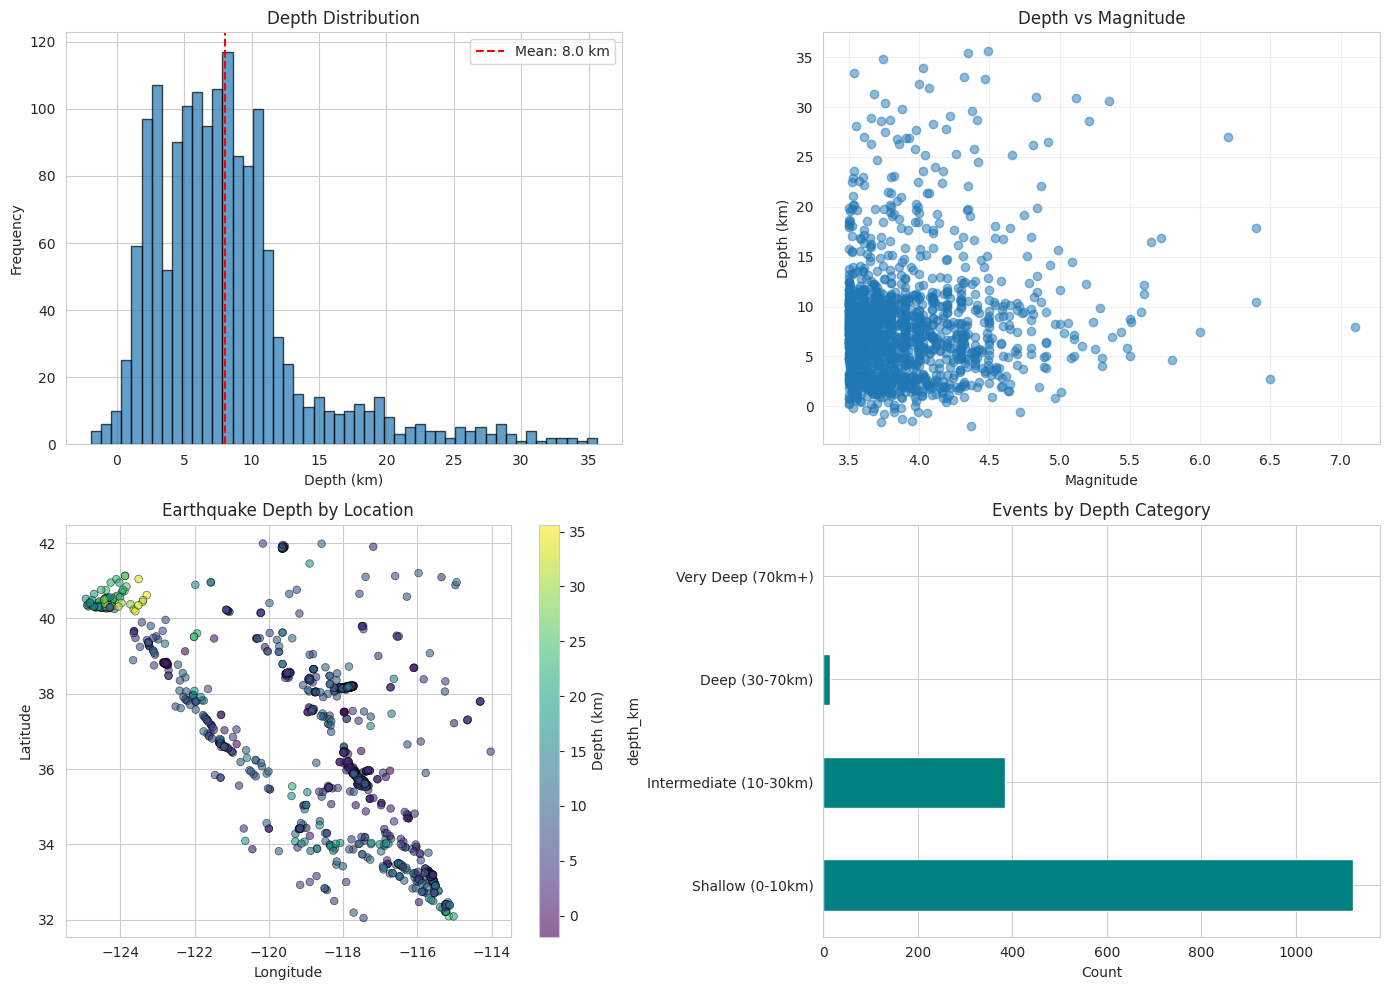


📊 Depth Statistics:
  Min: -1.92 km
  Max: 35.62 km
  Mean: 8.04 km
  Median: 7.16 km


In [11]:
# Depth analysis
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Depth distribution
axes[0, 0].hist(df['depth_km'], bins=50, edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Depth (km)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Depth Distribution')
axes[0, 0].axvline(df['depth_km'].mean(), color='red', linestyle='--', 
                    label=f'Mean: {df["depth_km"].mean():.1f} km')
axes[0, 0].legend()

# Depth vs Magnitude
axes[0, 1].scatter(df['magnitude'], df['depth_km'], alpha=0.5)
axes[0, 1].set_xlabel('Magnitude')
axes[0, 1].set_ylabel('Depth (km)')
axes[0, 1].set_title('Depth vs Magnitude')
axes[0, 1].grid(True, alpha=0.3)

# Depth by location
scatter = axes[1, 0].scatter(df['longitude'], df['latitude'], 
                             c=df['depth_km'], s=30,
                             cmap='viridis', alpha=0.6, edgecolors='black', linewidth=0.5)
axes[1, 0].set_xlabel('Longitude')
axes[1, 0].set_ylabel('Latitude')
axes[1, 0].set_title('Earthquake Depth by Location')
plt.colorbar(scatter, ax=axes[1, 0], label='Depth (km)')

# Depth categories
depth_cats = pd.cut(df['depth_km'], bins=[0, 10, 30, 70, 300], 
                    labels=['Shallow (0-10km)', 'Intermediate (10-30km)', 
                            'Deep (30-70km)', 'Very Deep (70km+)'])
depth_cats.value_counts().plot(kind='barh', ax=axes[1, 1], color='teal')
axes[1, 1].set_xlabel('Count')
axes[1, 1].set_title('Events by Depth Category')

plt.tight_layout()
plt.show()

print(f"\n📊 Depth Statistics:")
print(f"  Min: {df['depth_km'].min():.2f} km")
print(f"  Max: {df['depth_km'].max():.2f} km")
print(f"  Mean: {df['depth_km'].mean():.2f} km")
print(f"  Median: {df['depth_km'].median():.2f} km")

## 5. Temporal Patterns

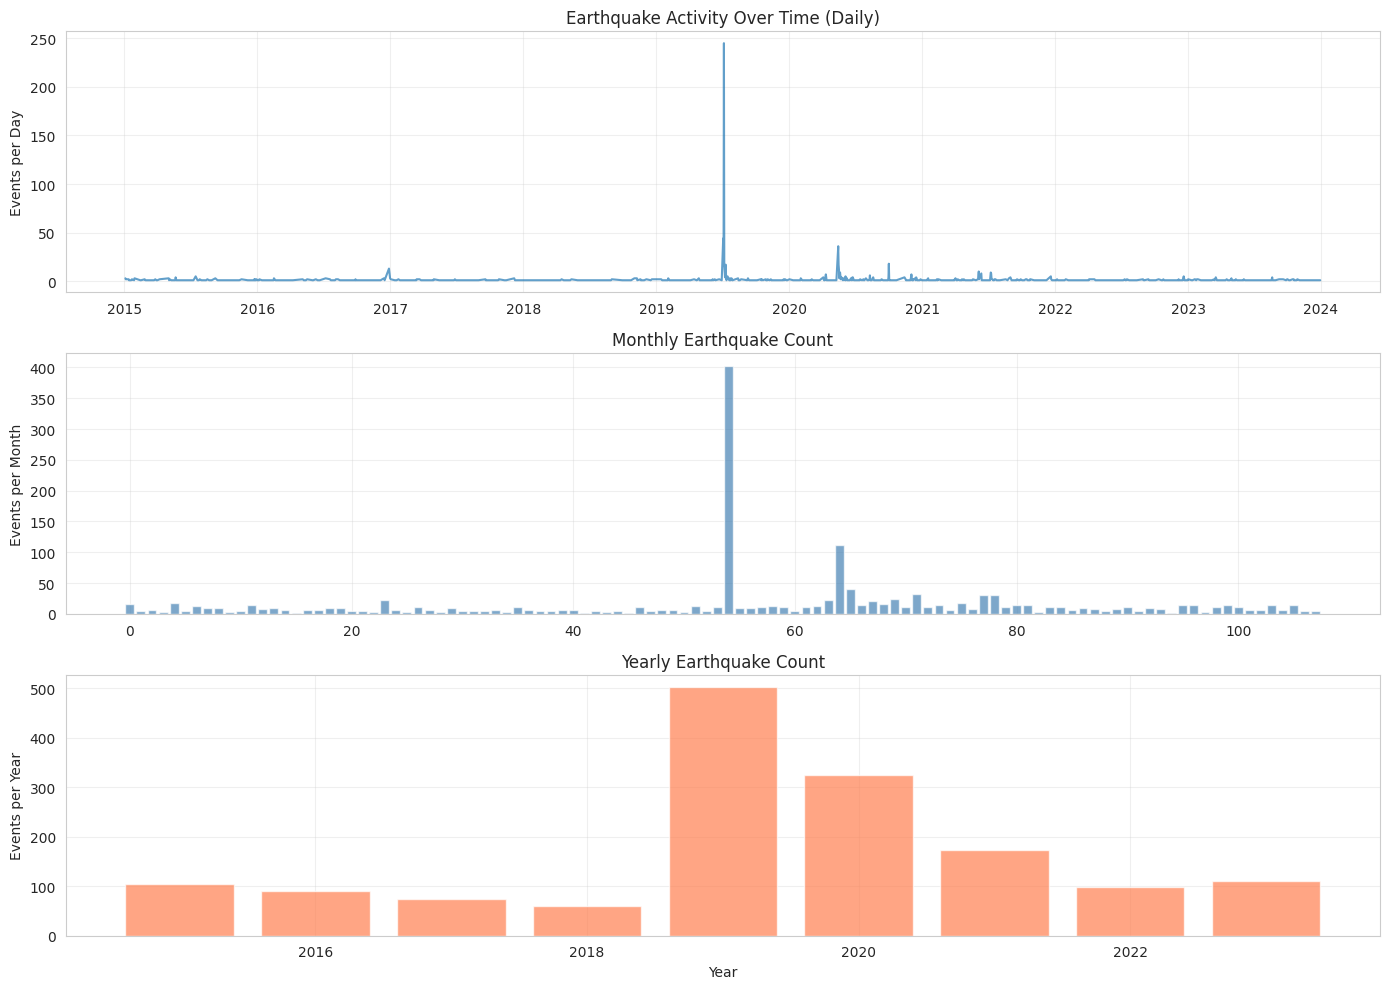

In [12]:
# Events over time
fig, axes = plt.subplots(3, 1, figsize=(14, 10))

# Daily events
daily_counts = df.groupby(df['time'].dt.date).size()
axes[0].plot(daily_counts.index, daily_counts.values, alpha=0.7)
axes[0].set_ylabel('Events per Day')
axes[0].set_title('Earthquake Activity Over Time (Daily)')
axes[0].grid(True, alpha=0.3)

# Monthly events
monthly_counts = df.groupby(df['time'].dt.to_period('M')).size()
axes[1].bar(range(len(monthly_counts)), monthly_counts.values, alpha=0.7, color='steelblue')
axes[1].set_ylabel('Events per Month')
axes[1].set_title('Monthly Earthquake Count')
axes[1].grid(True, alpha=0.3)

# Yearly events
yearly_counts = df.groupby('year').size()
axes[2].bar(yearly_counts.index, yearly_counts.values, alpha=0.7, color='coral')
axes[2].set_xlabel('Year')
axes[2].set_ylabel('Events per Year')
axes[2].set_title('Yearly Earthquake Count')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

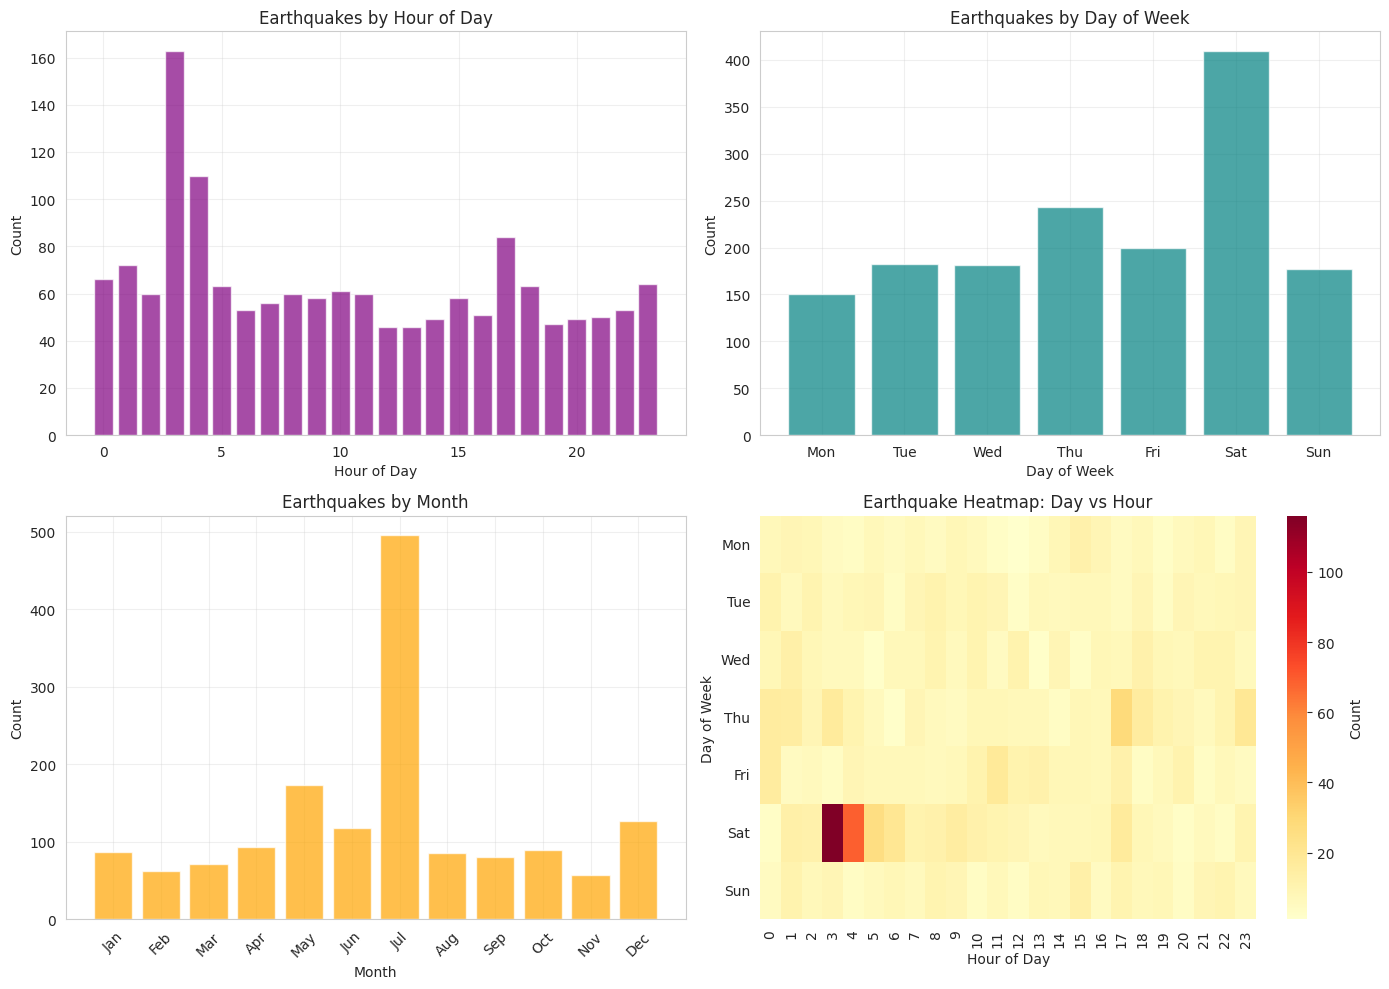

In [13]:
# Hour of day patterns
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Hourly distribution
hour_counts = df['hour'].value_counts().sort_index()
axes[0, 0].bar(hour_counts.index, hour_counts.values, alpha=0.7, color='purple')
axes[0, 0].set_xlabel('Hour of Day')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_title('Earthquakes by Hour of Day')
axes[0, 0].grid(True, alpha=0.3)

# Day of week
dow_counts = df['day_of_week'].value_counts().sort_index()
dow_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
axes[0, 1].bar(dow_labels, [dow_counts.get(i, 0) for i in range(7)], alpha=0.7, color='teal')
axes[0, 1].set_xlabel('Day of Week')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_title('Earthquakes by Day of Week')
axes[0, 1].grid(True, alpha=0.3)

# Monthly pattern
month_counts = df['month'].value_counts().sort_index()
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
axes[1, 0].bar(month_labels, [month_counts.get(i, 0) for i in range(1, 13)], 
               alpha=0.7, color='orange')
axes[1, 0].set_xlabel('Month')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title('Earthquakes by Month')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(True, alpha=0.3)

# Heatmap - Hour vs Day of Week
heatmap_data = df.groupby(['day_of_week', 'hour']).size().unstack(fill_value=0)
sns.heatmap(heatmap_data, cmap='YlOrRd', ax=axes[1, 1], cbar_kws={'label': 'Count'})
axes[1, 1].set_xlabel('Hour of Day')
axes[1, 1].set_ylabel('Day of Week')
axes[1, 1].set_yticklabels(dow_labels, rotation=0)
axes[1, 1].set_title('Earthquake Heatmap: Day vs Hour')

plt.tight_layout()
plt.show()

## 6. Data Quality Assessment

In [14]:
# Missing values
print("=" * 70)
print("DATA QUALITY ASSESSMENT")
print("=" * 70)

missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
quality_df = pd.DataFrame({
    'Missing Count': missing,
    'Missing %': missing_pct
}).sort_values('Missing %', ascending=False)

print("\n📊 Missing Values:")
print(quality_df[quality_df['Missing Count'] > 0])

DATA QUALITY ASSESSMENT

📊 Missing Values:
                           Missing Count   Missing %
horizontal_uncertainty_km           1542  100.000000
time_uncertainty_sec                1542  100.000000
depth_uncertainty_km                1542  100.000000
azimuthal_gap_deg                   1542  100.000000
stations_used                         11    0.713359
min_station_distance_deg               8    0.518807
depth_km                               7    0.453956


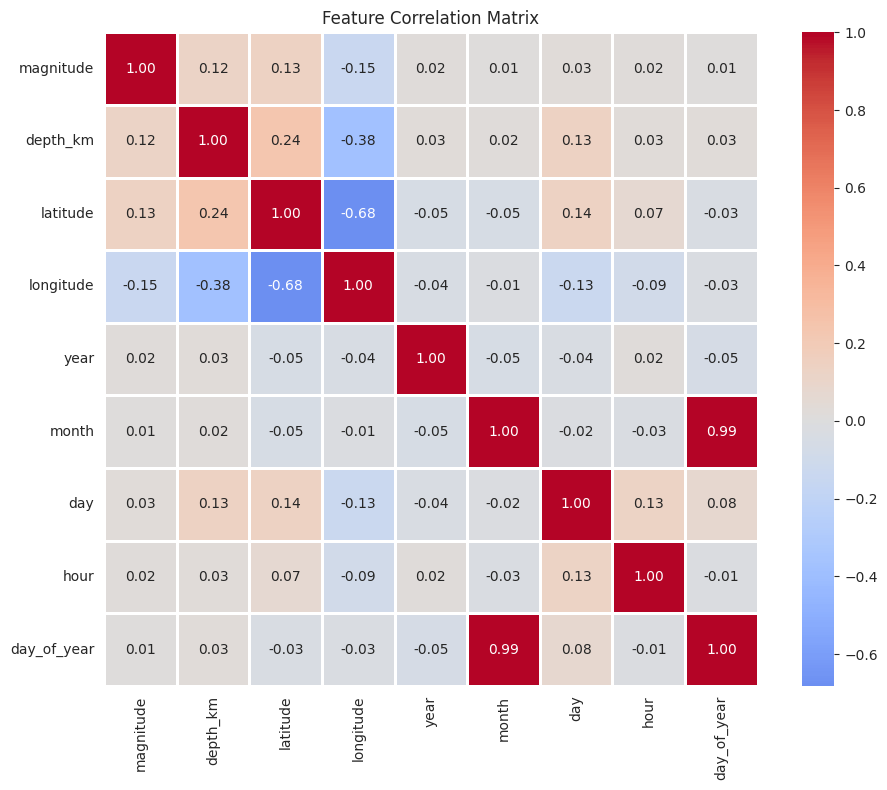

In [15]:
# Feature correlations
numeric_cols = ['magnitude', 'depth_km', 'latitude', 'longitude', 
                'year', 'month', 'day', 'hour', 'day_of_year']
available_cols = [col for col in numeric_cols if col in df.columns]

plt.figure(figsize=(10, 8))
correlation_matrix = df[available_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

## 7. Key Insights Summary

In [16]:
print("=" * 70)
print("KEY INSIGHTS")
print("=" * 70)

print(f"\n📊 Dataset Overview:")
print(f"  • Total Events: {len(df)}")
print(f"  • Time Span: {df['year'].min()} - {df['year'].max()}")
print(f"  • Geographic Coverage: California")

print(f"\n🎯 Magnitude Insights:")
print(f"  • Range: {df['magnitude'].min():.2f} - {df['magnitude'].max():.2f}")
print(f"  • Most common range: 3.5-4.0")
print(f"  • Large events (M≥5.0): {(df['magnitude'] >= 5.0).sum()}")

print(f"\n📍 Spatial Insights:")
print(f"  • Depth range: {df['depth_km'].min():.1f} - {df['depth_km'].max():.1f} km")
print(f"  • Average depth: {df['depth_km'].mean():.1f} km")
print(f"  • Most earthquakes are shallow (<30km)")

print(f"\n⏰ Temporal Insights:")
print(f"  • Average events per year: {len(df) / df['year'].nunique():.0f}")
print(f"  • No strong hour/day patterns (natural occurrence)")
print(f"  • Relatively uniform distribution across months")

print(f"\n✅ Data Quality:")
print(f"  • Complete magnitude data: 100%")
print(f"  • Complete location data: 100%")
print(f"  • Complete time data: 100%")
print(f"  • Ready for machine learning!")

KEY INSIGHTS

📊 Dataset Overview:
  • Total Events: 1542
  • Time Span: 2015 - 2023
  • Geographic Coverage: California

🎯 Magnitude Insights:
  • Range: 3.50 - 7.10
  • Most common range: 3.5-4.0
  • Large events (M≥5.0): 38

📍 Spatial Insights:
  • Depth range: -1.9 - 35.6 km
  • Average depth: 8.0 km
  • Most earthquakes are shallow (<30km)

⏰ Temporal Insights:
  • Average events per year: 171
  • No strong hour/day patterns (natural occurrence)
  • Relatively uniform distribution across months

✅ Data Quality:
  • Complete magnitude data: 100%
  • Complete location data: 100%
  • Complete time data: 100%
  • Ready for machine learning!
